In [1]:
import numpy as np

This was written by me to demonstrate Gradient Descent, it is not the most efficient way of doing things and you of course use the built in methods to do it

Hopefully this will demonstrate things what is actually going on in .fit() and how it figures out the weights

This is for our old friend Linear Regression but others could be written similarly. As much as possible I am avoiding loops unless I think it will better demonstrate what's going on.

Firstly we need a function that calculates the error. I am using MSE

\begin{equation}
\frac{1}{2m}\sum (\widehat{y_i} - y_i)^2
\end{equation}

where $\widehat{y_i} = w_0+w_1x_1+w_2x_2+....$

In [2]:
def error(X,y,w):
    div = 2*len(y)
    return ((np.dot(X,w) - y)**2).sum()/div

Not the best way of doing things, but let's make a function for calculating the change for one particular $w_c$

c is the column number we're checking, the gradient for one particular one is
\begin{equation}
\frac{\partial L}{\partial w_c} = \frac{1}{m}\sum (\widehat{y_i}-y_i)*x_c
\end{equation}

which you should see reflected below

In [3]:
def grad(X,y,w,c):
    div = len(y)
    return (X[:, c]*(np.dot(X,w) - y)).sum()/div

Here's me writing a loop (usually you don't do this, it increases the computational time and when doing this stuff every optimisation counts, but I think it will demonstrate things better)

full grad loops over all the weights, finds out the change for each individual w and puts it into an array

In [4]:
def loopfullgrad(X,y,w):
    allgrad = np.array([])
    for i in range(len(w)):
        allgrad = np.append(allgrad, grad(X,y,w,i))
    return allgrad   

In [5]:
#Here's a better one that doesn't use a loop so faster
def fullgrad(X,y,w):
    div = len(y)
    prediction = np.dot(X,w)
    allgrad = X.T.dot((prediction - y))/div
    return allgrad

The code for performing one step of gradient descent is done. Now let's set up the thing we want to find the best weights for.

Like sklearn, this requires each row in X correspond to one from the sample. If we want an intercept ($w_0$), we need to add that in with feature 0 being all 1

Take note, there is no error checking, I was lazy in writing them! Make sure everything is as expected.

In [6]:
X = np.array([[1,2],[1,5],[1,8],[1,12]])

In [7]:
X

array([[ 1,  2],
       [ 1,  5],
       [ 1,  8],
       [ 1, 12]])

y is a 1-d as normal y[0] is the true value for X[0]

In [8]:
y = np.array([4,11,19,25])

In [9]:
y

array([ 4, 11, 19, 25])

We need to now pick initial weights to start with, there are two weights required

I've just picked 20 and 50. You could set this with random numbers or maybe try 0,0

In [10]:
w = np.array([20, 50])

How bad is the current model of 
\begin{equation}
\hat{y} = 20 + 50x
\end{equation}

In [11]:
error(X,y,w)

74420.375

Find the gradient now

In [12]:
onestep = loopfullgrad(X,y,w)
onestep

array([ 342.75, 2968.75])

In [13]:
onestep = fullgrad(X,y,w)

In [14]:
onestep

array([ 342.75, 2968.75])

We can see that
\begin{equation}
\nabla L = (342.75, 2968.75)
\end{equation}

Now update the weights using the learning rate of $\alpha=1$

\begin{equation}
\textbf{w}^1 = \textbf{w}^0 - \alpha*\nabla L
\end{equation}

In [15]:
alpha = 1

In [16]:
newweight = w - alpha*onestep
newweight

array([ -322.75, -2918.75])

In [17]:
error(X,y,newweight)

259169836.8671875

Ok, that was a terrible attempt! Our $\alpha$ is far too big. Let's try 0.01

In [18]:
alpha = 0.01

In [19]:
weight_1 = w - alpha*onestep
weight_1

array([16.5725, 20.3125])

In [20]:
error(X,y,weight_1)

11913.470811718747

An improvement! 

Let's do another step

In [21]:
weight_2 = weight_1 - alpha*fullgrad(X,y,weight_1)
weight_2

array([15.18318125,  8.4462    ])

In [22]:
error(X,y,weight_2)

1923.257547730489

There's no way of avoiding loops now, so let's do 50 steps and see where we are

In [23]:
weights = weight_2
for i in range(50):
    weights = weights - alpha*fullgrad(X,y,weights)
    print("Weights:", weights, ", error:", error(X,y,weights))

Weights: [14.60873094  3.70446177] , error: 326.492271589584
Weights: [14.36009246  1.81097883] , error: 71.20501095436816
Weights: [14.24175046  1.05616763] , error: 30.31903149997327
Weights: [14.17554164  0.75657015] , error: 23.699990551816963
Weights: [14.13021774  0.63895328] , error: 22.55802661361252
Weights: [14.09328622  0.59408376] , error: 22.291816152387437
Weights: [14.0597527   0.57829231] , error: 22.165953739761235
Weights: [14.02762044  0.57412081] , error: 22.06290192165977
Weights: [13.99609108  0.57458985] , error: 21.963873618182713
Weights: [13.96484536  0.57690922] , error: 21.865864474689154
Weights: [13.93375553  0.57996344] , error: 21.76839260866761
Weights: [13.90277045  0.5833066 ] , error: 21.671379297957742
Weights: [13.87186955  0.58676044] , error: 21.574810263022624
Weights: [13.84104452  0.59025368] , error: 21.478681531562327
Weights: [13.81029195  0.59375787] , error: 21.382990786324065
Weights: [13.77961038  0.59726163] , error: 21.28773598223626


still getting smaller, let's do some more but I'm going to break if the error flattens or increases

In [24]:
currenterror = error(X,y,weights)
for i in range(50):
    weights = weights - alpha*fullgrad(X,y,weights)
    newerror = error(X,y,weights)
    print("Weights:", weights, ", error:", newerror)
    if newerror >= currenterror:
        break

Weights: [12.74873521  0.71515345] , error: 18.213604035344517
Weights: [12.72047501  0.7183854 ] , error: 18.1327877881926
Weights: [12.69227924  0.72160999] , error: 18.05233971000584
Weights: [12.66414777  0.72482722] , error: 17.97225812354245
Weights: [12.63608046  0.72803712] , error: 17.892541359201534
Weights: [12.60807715  0.73123969] , error: 17.813187754988295
Weights: [12.5801377   0.73443497] , error: 17.734195656479347
Weights: [12.55226196  0.73762295] , error: 17.655563416788258
Weights: [12.52444979  0.74080367] , error: 17.577289396531192
Weights: [12.49670105  0.74397714] , error: 17.49937196379277
Weights: [12.46901558  0.74714336] , error: 17.42180949409197
Weights: [12.44139325  0.75030237] , error: 17.344600370348356
Weights: [12.4138339   0.75345417] , error: 17.267742982848272
Weights: [12.38633741  0.75659879] , error: 17.191235729211346
Weights: [12.35890362  0.75973623] , error: 17.115077014357038
Weights: [12.33153238  0.76286652] , error: 17.03926525047143

In [25]:
for i in range(5000):
    weights = weights - alpha*fullgrad(X,y,weights)
    newerror = error(X,y,weights)
    print("Weights:", weights, ", error:", newerror)
    if newerror >= currenterror:
        break

Weights: [11.41186502  0.86804356] , error: 14.592613116262225
Weights: [11.38665343  0.87092686] , error: 14.528292765993875
Weights: [11.36149933  0.87380359] , error: 14.464265435478765
Weights: [11.3364026   0.87667376] , error: 14.400529789827129
Weights: [11.31136309  0.87953738] , error: 14.337084500230496
Weights: [11.28638069  0.88239447] , error: 14.273928243933957
Weights: [11.26145526  0.88524505] , error: 14.21105970420857
Weights: [11.23658666  0.88808913] , error: 14.148477570323932
Weights: [11.21177478  0.89092672] , error: 14.086180537520852
Weights: [11.18701948  0.89375784] , error: 14.024167306984111
Weights: [11.16232063  0.89658251] , error: 13.962436585815455
Weights: [11.1376781   0.89940073] , error: 13.900987087006559
Weights: [11.11309177  0.90221252] , error: 13.839817529412253
Weights: [11.08856151  0.90501791] , error: 13.778926637723778
Weights: [11.06408719  0.9078169 ] , error: 13.718313142442222
Weights: [11.03966867  0.9106095 ] , error: 13.657975779

Weights: [0.80543484 2.08103963] , error: 0.4970597038625321
Weights: [0.80441032 2.0811568 ] , error: 0.496953487460845
Weights: [0.80338813 2.0812737 ] , error: 0.49684775494184447
Weights: [0.80236828 2.08139033] , error: 0.49674250410113663
Weights: [0.80135075 2.0815067 ] , error: 0.4966377327443761
Weights: [0.80033554 2.08162281] , error: 0.4965334386872109
Weights: [0.79932264 2.08173864] , error: 0.49642961975523825
Weights: [0.79831206 2.08185422] , error: 0.4963262737839655
Weights: [0.79730378 2.08196953] , error: 0.4962233986187567
Weights: [0.79629779 2.08208458] , error: 0.4961209921147949
Weights: [0.79529411 2.08219936] , error: 0.4960190521370315
Weights: [0.79429271 2.08231389] , error: 0.49591757656014634
Weights: [0.79329359 2.08242815] , error: 0.49581656326850027
Weights: [0.79229676 2.08254215] , error: 0.4957160101560924
Weights: [0.7913022 2.0826559] , error: 0.49561591512651665
Weights: [0.7903099  2.08276938] , error: 0.4955162760929158
Weights: [0.78931987 

Weights: [0.63751624 2.10024351] , error: 0.48288809701328583
Weights: [0.63687465 2.10031688] , error: 0.4828464412168273
Weights: [0.63623451 2.10039009] , error: 0.4828049751887875
Weights: [0.63559583 2.10046313] , error: 0.48276369806465214
Weights: [0.63495861 2.10053601] , error: 0.48272260898384445
Weights: [0.63432285 2.10060872] , error: 0.4826817070897097
Weights: [0.63368853 2.10068126] , error: 0.48264099152949264
Weights: [0.63305566 2.10075364] , error: 0.4826004614543262
Weights: [0.63242423 2.10082585] , error: 0.48256011601920934
Weights: [0.63179424 2.1008979 ] , error: 0.48251995438298945
Weights: [0.63116569 2.10096978] , error: 0.4824799757083466
Weights: [0.63053858 2.1010415 ] , error: 0.4824401791617765
Weights: [0.62991289 2.10111306] , error: 0.48240056391356895
Weights: [0.62928863 2.10118445] , error: 0.48236112913779766
Weights: [0.62866579 2.10125568] , error: 0.4823218740122953
Weights: [0.62804438 2.10132675] , error: 0.4822827977186428
Weights: [0.6274

Weights: [0.54101175 2.11128017] , error: 0.4776911722159709
Weights: [0.54059023 2.11132837] , error: 0.4776731916889285
Weights: [0.54016966 2.11137647] , error: 0.4776552930745258
Weights: [0.53975005 2.11142446] , error: 0.47763747599959705
Weights: [0.5393314  2.11147234] , error: 0.4776197400926801
Weights: [0.5389137  2.11152011] , error: 0.47760208498400214
Weights: [0.53849696 2.11156777] , error: 0.4775845103054777
Weights: [0.53808116 2.11161532] , error: 0.4775670156906942
Weights: [0.53766632 2.11166276] , error: 0.47754960077491415
Weights: [0.53725242 2.1117101 ] , error: 0.4775322651950554
Weights: [0.53683946 2.11175733] , error: 0.4775150085896942
Weights: [0.53642745 2.11180445] , error: 0.4774978305990514
Weights: [0.53601637 2.11185146] , error: 0.4774807308649886
Weights: [0.53560624 2.11189836] , error: 0.47746370903099633
Weights: [0.53519703 2.11194516] , error: 0.477446764742191
Weights: [0.53478876 2.11199185] , error: 0.47742989764530647
Weights: [0.53438143

Weights: [0.47956499 2.11830748] , error: 0.4755032764193624
Weights: [0.47928358 2.11833966] , error: 0.47549526313727064
Weights: [0.47900282 2.11837177] , error: 0.47548728636073223
Weights: [0.4787227  2.11840381] , error: 0.47547934592344065
Weights: [0.47844321 2.11843577] , error: 0.475471441659848
Weights: [0.47816437 2.11846766] , error: 0.47546357340515977
Weights: [0.47788616 2.11849948] , error: 0.4754557409953334
Weights: [0.47760858 2.11853122] , error: 0.4754479442670722
Weights: [0.47733164 2.11856289] , error: 0.4754401830578243
Weights: [0.47705533 2.11859449] , error: 0.47543245720577976
Weights: [0.47677964 2.11862602] , error: 0.4754247665498614
Weights: [0.47650459 2.11865748] , error: 0.47541711092973105
Weights: [0.47623017 2.11868886] , error: 0.47540949018577694
Weights: [0.47595637 2.11872018] , error: 0.4754019041591174
Weights: [0.47568319 2.11875142] , error: 0.4753943526915926
Weights: [0.47541064 2.11878259] , error: 0.47538683562576417
Weights: [0.47513

Weights: [0.42278544 2.12480103] , error: 0.4742569770233621
Weights: [0.42263352 2.1248184 ] , error: 0.47425464142088447
Weights: [0.42248194 2.12483574] , error: 0.4742523164585488
Weights: [0.42233071 2.12485303] , error: 0.4742500020878816
Weights: [0.42217982 2.12487029] , error: 0.4742476982606337
Weights: [0.42202928 2.1248875 ] , error: 0.4742454049287723
Weights: [0.42187908 2.12490468] , error: 0.4742431220444816
Weights: [0.42172922 2.12492182] , error: 0.4742408495601693
Weights: [0.42157971 2.12493892] , error: 0.4742385874284562
Weights: [0.42143054 2.12495598] , error: 0.4742363356021784
Weights: [0.4212817 2.124973 ] , error: 0.47423409403438954
Weights: [0.42113321 2.12498998] , error: 0.47423186267835643
Weights: [0.42098505 2.12500693] , error: 0.4742296414875564
Weights: [0.42083723 2.12502383] , error: 0.4742274304156806
Weights: [0.42068975 2.1250407 ] , error: 0.4742252294166312
Weights: [0.42054261 2.12505753] , error: 0.47422303844452135
Weights: [0.4203958  2

Weights: [0.39675778 2.12777766] , error: 0.47393463581200607
Weights: [0.39666521 2.12778825] , error: 0.4739337686770017
Weights: [0.39657286 2.12779881] , error: 0.4739329054923437
Weights: [0.39648071 2.12780935] , error: 0.47393204624003504
Weights: [0.39638877 2.12781986] , error: 0.47393119090216373
Weights: [0.39629704 2.12783035] , error: 0.4739303394608945
Weights: [0.39620552 2.12784082] , error: 0.47392949189847855
Weights: [0.39611421 2.12785126] , error: 0.4739286481972432
Weights: [0.39602311 2.12786168] , error: 0.47392780833959947
Weights: [0.39593221 2.12787207] , error: 0.47392697230803665
Weights: [0.39584153 2.12788245] , error: 0.47392614008512357
Weights: [0.39575105 2.12789279] , error: 0.4739253116535122
Weights: [0.39566077 2.12790312] , error: 0.47392448699592854
Weights: [0.3955707  2.12791342] , error: 0.4739236660951799
Weights: [0.39548084 2.1279237 ] , error: 0.4739228489341529
Weights: [0.39539118 2.12793395] , error: 0.4739220354958091
Weights: [0.3953

Weights: [0.38357488 2.12928531] , error: 0.47383108055365925
Weights: [0.38351238 2.12929246] , error: 0.47383068517815385
Weights: [0.38345001 2.12929959] , error: 0.4738302916038334
Weights: [0.38338779 2.12930671] , error: 0.47382989982249185
Weights: [0.38332571 2.12931381] , error: 0.47382950982596117
Weights: [0.38326377 2.12932089] , error: 0.4738291216061111
Weights: [0.38320197 2.12932796] , error: 0.47382873515484647
Weights: [0.38314031 2.12933501] , error: 0.47382835046411165
Weights: [0.3830788  2.12934205] , error: 0.47382796752588635
Weights: [0.38301742 2.12934906] , error: 0.47382758633218475
Weights: [0.38295619 2.12935607] , error: 0.47382720687506164
Weights: [0.38289509 2.12936306] , error: 0.47382682914660423
Weights: [0.38283413 2.12937003] , error: 0.4738264531389392
Weights: [0.38277331 2.12937698] , error: 0.4738260788442251
Weights: [0.38271263 2.12938392] , error: 0.47382570625466003
Weights: [0.38265209 2.12939085] , error: 0.47382533536247584
Weights: [0.

Weights: [0.37212063 2.13059527] , error: 0.47377370182556866
Weights: [0.37208425 2.13059943] , error: 0.4737735678463506
Weights: [0.37204794 2.13060358] , error: 0.4737734344774919
Weights: [0.37201172 2.13060772] , error: 0.47377330171621246
Weights: [0.37197558 2.13061186] , error: 0.47377316955974447
Weights: [0.37193953 2.13061598] , error: 0.47377303800533255
Weights: [0.37190355 2.13062009] , error: 0.47377290705023406
Weights: [0.37186766 2.1306242 ] , error: 0.47377277669171847
Weights: [0.37183185 2.13062829] , error: 0.47377264692706755
Weights: [0.37179612 2.13063238] , error: 0.47377251775357665
Weights: [0.37176047 2.13063646] , error: 0.4737723891685531
Weights: [0.37172491 2.13064052] , error: 0.4737722611693158
Weights: [0.37168942 2.13064458] , error: 0.4737721337531945
Weights: [0.37165402 2.13064863] , error: 0.4737720069175343
Weights: [0.3716187  2.13065267] , error: 0.4737718806596909
Weights: [0.37158346 2.1306567 ] , error: 0.47377175497703217
Weights: [0.371

Weights: [0.36481821 2.1314304 ] , error: 0.473752942782038
Weights: [0.36479847 2.13143266] , error: 0.4737529033733525
Weights: [0.36477878 2.13143491] , error: 0.47375286414419976
Weights: [0.36475914 2.13143716] , error: 0.4737528250937584
Weights: [0.36473954 2.1314394 ] , error: 0.47375278622121725
Weights: [0.36471998 2.13144164] , error: 0.4737527475257655
Weights: [0.36470047 2.13144387] , error: 0.4737527090065955
Weights: [0.36468101 2.13144609] , error: 0.47375267066290416
Weights: [0.36466159 2.13144832] , error: 0.4737526324938938
Weights: [0.36464221 2.13145053] , error: 0.4737525944987666
Weights: [0.36462288 2.13145274] , error: 0.4737525566767309
Weights: [0.36460359 2.13145495] , error: 0.4737525190269985
Weights: [0.36458434 2.13145715] , error: 0.4737524815487848
Weights: [0.36456514 2.13145935] , error: 0.47375244424130847
Weights: [0.36454598 2.13146154] , error: 0.4737524071037895
Weights: [0.36452687 2.13146372] , error: 0.47375237013545707
Weights: [0.3645078 

Weights: [0.36081509 2.13188822] , error: 0.47374679066023995
Weights: [0.36080449 2.13188943] , error: 0.473746779278349
Weights: [0.36079391 2.13189064] , error: 0.4737467679483093
Weights: [0.36078335 2.13189185] , error: 0.4737467566698847
Weights: [0.36077282 2.13189305] , error: 0.4737467454428412
Weights: [0.36076231 2.13189425] , error: 0.4737467342669445
Weights: [0.36075182 2.13189545] , error: 0.4737467231419592
Weights: [0.36074136 2.13189665] , error: 0.4737467120676566
Weights: [0.36073092 2.13189784] , error: 0.47374670104380384
Weights: [0.36072051 2.13189903] , error: 0.4737466900701728
Weights: [0.36071012 2.13190022] , error: 0.4737466791465328
Weights: [0.36069975 2.13190141] , error: 0.473746668272656
Weights: [0.36068941 2.13190259] , error: 0.47374665744831845
Weights: [0.36067909 2.13190377] , error: 0.4737466466732907
Weights: [0.3606688  2.13190495] , error: 0.47374663594735106
Weights: [0.36065853 2.13190612] , error: 0.473746625270275
Weights: [0.36064828 2.

Weights: [0.35866375 2.13213425] , error: 0.4737450138239751
Weights: [0.35865805 2.1321349 ] , error: 0.4737450105366933
Weights: [0.35865237 2.13213556] , error: 0.47374500726438745
Weights: [0.35864669 2.1321362 ] , error: 0.4737450040069887
Weights: [0.35864103 2.13213685] , error: 0.47374500076442916
Weights: [0.35863539 2.1321375 ] , error: 0.4737449975366417
Weights: [0.35862975 2.13213814] , error: 0.47374499432355943
Weights: [0.35862413 2.13213878] , error: 0.4737449911251144
Weights: [0.35861852 2.13213943] , error: 0.47374498794124126
Weights: [0.35861292 2.13214007] , error: 0.47374498477187155
Weights: [0.35860734 2.1321407 ] , error: 0.47374498161694023
Weights: [0.35860177 2.13214134] , error: 0.4737449784763815
Weights: [0.35859621 2.13214198] , error: 0.47374497535013066
Weights: [0.35859066 2.13214261] , error: 0.47374497223812173
Weights: [0.35858513 2.13214324] , error: 0.47374496914029046
Weights: [0.35857961 2.13214388] , error: 0.4737449660565708
Weights: [0.358

Weights: [0.35753547 2.13226329] , error: 0.4737445093865029
Weights: [0.35753234 2.13226365] , error: 0.47374450839725224
Weights: [0.35752923 2.132264  ] , error: 0.4737445074125073
Weights: [0.35752611 2.13226436] , error: 0.4737445064322502
Weights: [0.35752301 2.13226471] , error: 0.47374450545645747
Weights: [0.35751991 2.13226507] , error: 0.47374450448510996
Weights: [0.35751682 2.13226542] , error: 0.47374450351818786
Weights: [0.35751373 2.13226577] , error: 0.4737445025556709
Weights: [0.35751066 2.13226613] , error: 0.4737445015975388
Weights: [0.35750759 2.13226648] , error: 0.47374450064377205
Weights: [0.35750452 2.13226683] , error: 0.4737444996943495
Weights: [0.35750147 2.13226718] , error: 0.4737444987492522
Weights: [0.35749842 2.13226753] , error: 0.4737444978084613
Weights: [0.35749538 2.13226787] , error: 0.47374449687195563
Weights: [0.35749234 2.13226822] , error: 0.4737444959397161
Weights: [0.35748931 2.13226857] , error: 0.4737444950117244
Weights: [0.357486

Weights: [0.35692864 2.13233269] , error: 0.47374435970710355
Weights: [0.3569269  2.13233289] , error: 0.4737443593997367
Weights: [0.35692516 2.13233309] , error: 0.47374435909377105
Weights: [0.35692343 2.13233328] , error: 0.4737443587891975
Weights: [0.3569217  2.13233348] , error: 0.4737443584860126
Weights: [0.35691997 2.13233368] , error: 0.47374435818420896
Weights: [0.35691825 2.13233388] , error: 0.47374435788377933
Weights: [0.35691653 2.13233407] , error: 0.4737443575847187
Weights: [0.35691481 2.13233427] , error: 0.47374435728702097
Weights: [0.3569131  2.13233447] , error: 0.47374435699067885
Weights: [0.35691139 2.13233466] , error: 0.4737443566956878
Weights: [0.35690969 2.13233486] , error: 0.4737443564020395
Weights: [0.35690799 2.13233505] , error: 0.47374435610972915
Weights: [0.35690629 2.13233524] , error: 0.47374435581875063
Weights: [0.3569046  2.13233544] , error: 0.47374435552909755
Weights: [0.35690291 2.13233563] , error: 0.47374435524076364
Weights: [0.35

Weights: [0.3565943  2.13237092] , error: 0.4737443135871105
Weights: [0.35659332 2.13237104] , error: 0.47374431348984924
Weights: [0.35659234 2.13237115] , error: 0.4737443133930312
Weights: [0.35659136 2.13237126] , error: 0.4737443132966542
Weights: [0.35659039 2.13237137] , error: 0.47374431320071675
Weights: [0.35658942 2.13237148] , error: 0.4737443131052157
Weights: [0.35658845 2.13237159] , error: 0.47374431301014985
Weights: [0.35658748 2.1323717 ] , error: 0.47374431291551716
Weights: [0.35658652 2.13237181] , error: 0.47374431282131535
Weights: [0.35658555 2.13237192] , error: 0.4737443127275424
Weights: [0.35658459 2.13237203] , error: 0.4737443126341969
Weights: [0.35658364 2.13237214] , error: 0.473744312541277
Weights: [0.35658268 2.13237225] , error: 0.47374431244878057
Weights: [0.35658173 2.13237236] , error: 0.47374431235670533
Weights: [0.35658077 2.13237247] , error: 0.4737443122650491
Weights: [0.35657982 2.13237258] , error: 0.4737443121738113
Weights: [0.356578

Weights: [0.35645402 2.13238697] , error: 0.47374430192760836
Weights: [0.35645336 2.13238704] , error: 0.47374430188346267
Weights: [0.3564527  2.13238712] , error: 0.47374430183951904
Weights: [0.35645204 2.13238719] , error: 0.4737443017957752
Weights: [0.35645139 2.13238727] , error: 0.47374430175223087
Weights: [0.35645073 2.13238734] , error: 0.4737443017088858
Weights: [0.35645008 2.13238742] , error: 0.4737443016657374
Weights: [0.35644943 2.13238749] , error: 0.4737443016227853
Weights: [0.35644878 2.13238757] , error: 0.473744301580029
Weights: [0.35644813 2.13238764] , error: 0.4737443015374678
Weights: [0.35644748 2.13238772] , error: 0.4737443014951003
Weights: [0.35644684 2.13238779] , error: 0.47374430145292584
Weights: [0.35644619 2.13238786] , error: 0.4737443014109432
Weights: [0.35644555 2.13238794] , error: 0.4737443013691526
Weights: [0.35644491 2.13238801] , error: 0.4737443013275522
Weights: [0.35644427 2.13238808] , error: 0.47374430128614087
Weights: [0.3564436

Weights: [0.35635294 2.13239853] , error: 0.47374429634445653
Weights: [0.35635251 2.13239858] , error: 0.47374429632574633
Weights: [0.35635208 2.13239863] , error: 0.4737442963071214
Weights: [0.35635166 2.13239867] , error: 0.4737442962885809
Weights: [0.35635123 2.13239872] , error: 0.47374429627012526
Weights: [0.3563508  2.13239877] , error: 0.47374429625175485
Weights: [0.35635038 2.13239882] , error: 0.4737442962334671
Weights: [0.35634995 2.13239887] , error: 0.4737442962152618
Weights: [0.35634953 2.13239892] , error: 0.47374429619714153
Weights: [0.35634911 2.13239897] , error: 0.47374429617910246
Weights: [0.35634869 2.13239901] , error: 0.4737442961611446
Weights: [0.35634827 2.13239906] , error: 0.47374429614326996
Weights: [0.35634785 2.13239911] , error: 0.4737442961254763
Weights: [0.35634743 2.13239916] , error: 0.4737442961077647
Weights: [0.35634701 2.13239921] , error: 0.47374429609013335
Weights: [0.3563466  2.13239925] , error: 0.4737442960725817
Weights: [0.3563

I'm curious, what does sklearn get?

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression(fit_intercept=False)

fit_intercept is set to false as we already have the intercept included. (The columns of 1)

In [28]:
model.fit(X,y)

LinearRegression(fit_intercept=False)

In [29]:
model.coef_

array([0.35616438, 2.13242009])

Close! They spent a lot more time writing better code

I want to do more stuff but I'm writing a function now

In [30]:
import matplotlib.pyplot as plt

In [180]:
def getcoefficients(X,y,w,alpha,epochs=500,printing=False, plotting=False, showall=False):
    weights = w
    currenterror = error(X,y,w)
    if plotting:
        recorderrors = []
        recorderrors.append(currenterror)
        maxepoch=0
    for i in range(epochs):
        weights = weights - alpha*fullgrad(X,y,weights)
        if printing:
            print("Weights:", weights, ", error:", error(X,y,weights))
        #if error(X,y,weights) >= currenterror:
        #    break
        currenterror = error(X,y,weights)
        if plotting:
            maxepoch +=1
            recorderrors.append(currenterror)
    if plotting:
        fig,ax = plt.subplots(figsize=(12,8))

        ax.set_ylabel('J(Theta)')
        ax.set_xlabel('Iterations')
        _=ax.plot(range(maxepoch+1),recorderrors,'b.')
        if not showall:
            ax.set_ylim(0, min(recorderrors)+20)
    return weights

Another thing to see, what happens if we pick completely different weights

In [32]:
w = np.array([-20, 200])

In [33]:
getcoefficients(X,y,w,0.01,10000,True)

Weights: [-33.1525  84.1375] , error: 181236.87581171875
Weights: [-38.35275625  37.811325  ] , error: 29139.45226704825
Weights: [-40.37399313  19.28442598] , error: 4829.787718598396
Weights: [-41.12445195  11.87114812] , error: 943.7261847437571
Weights: [-41.36700993   8.90089337] , error: 321.85792516350455
Weights: [-41.40665013   7.70688722] , error: 221.6908910783225
Weights: [-41.36529852   7.22300542] , error: 204.9079733987772
Weights: [-41.2916984    7.02303236] , error: 201.45539554397214
Weights: [-41.2053361    6.93657533] , error: 200.1368400071467
Weights: [-41.11400157   6.89551463] , error: 199.16284629247866
Weights: [-41.02080879   6.87261732] , error: 198.247399071748
Weights: [-40.92700237   6.85699615] , error: 197.3447702818442
Weights: [-40.83307959   6.84429859] , error: 196.44763569512233
Weights: [-40.73923895   6.83278455] , error: 195.55480902498613
Weights: [-40.64555952   6.82175833] , error: 194.6660850489728
Weights: [-40.55207261   6.81094179] , erro

array([0.35616438, 2.13242009])

I had put in the ability to plot too so why not plot the error

array([0.35616438, 2.13242009])

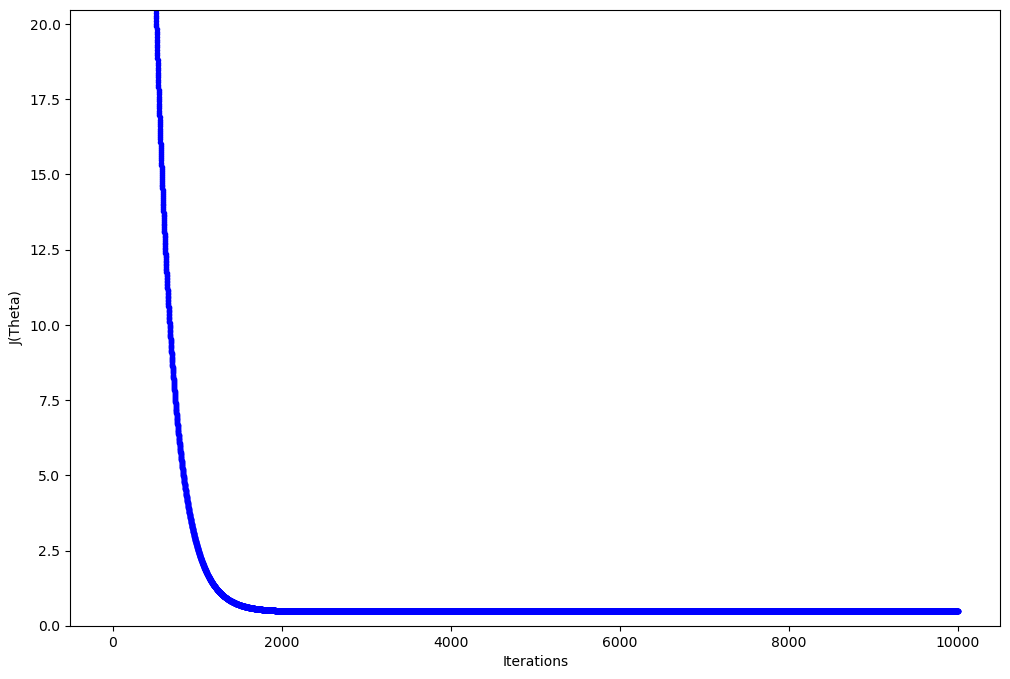

In [34]:
getcoefficients(X,y,w,0.01,10000,False, True)

It should hopefully still get there

With more complicated functions it might get "stuck" in one of those valleys like I said in class but thankfully this example does not

What did the graph look like with the [20,50] initial weights

array([0.35631862, 2.13240245])

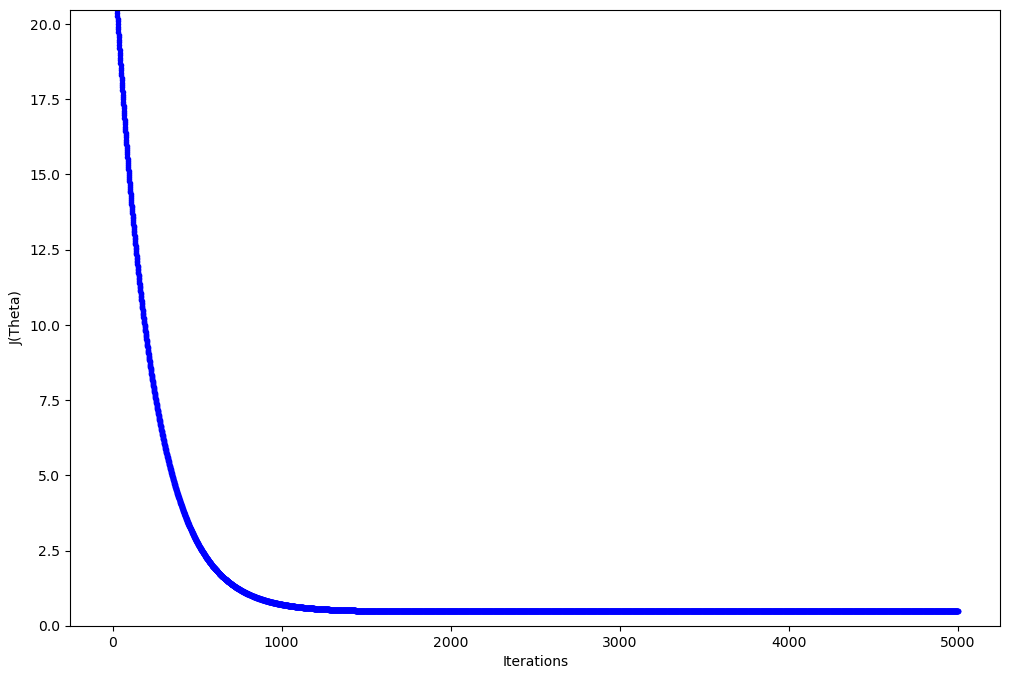

In [35]:
getcoefficients(X,y,np.array([20,50]),0.01,5000, False, True)

The error got smaller at an earlier epoch

Other ML systems will use the idea of changing the learning rate every so often (Neural Networks with solver=adam does this), so it gets an initial kick with a higher learning rate to start, then when it pleateaus - it shrinks the learning rate to try and learn some more, etc.

Now let's see if it works with more features - It should as I wrote the functions to use numpy arrays

In [36]:
X = np.array([[1,5,8,2,6], [1,2,8,-10,23], [1,2,8,10,-23],
             [1,12,-2,5,23],[1,24,8,21,23],[1,53,4,6,12],[1,3,2,-5,-10]])

In [37]:
X.shape

(7, 5)

In [38]:
y = np.array([8,-3,4,10,1,6,12])

In [39]:
y.shape

(7,)

This time I'm setting the initial weights to be random numbers, hopefully it doesn't mess up below when you run it

In [40]:
w = np.random.uniform(size=5)

In [41]:
model = LinearRegression(fit_intercept=False)

In [42]:
model.fit(X,y)

LinearRegression(fit_intercept=False)

In [43]:
model.coef_

array([ 1.15677080e+01,  3.25267906e-03, -1.02505283e+00,  3.35661860e-02,
       -1.36555447e-01])

In [44]:
alpha=0.001

Any bigger alpha will fail

array([ 1.15676231e+01,  3.25387992e-03, -1.02504378e+00,  3.35656226e-02,
       -1.36555012e-01])

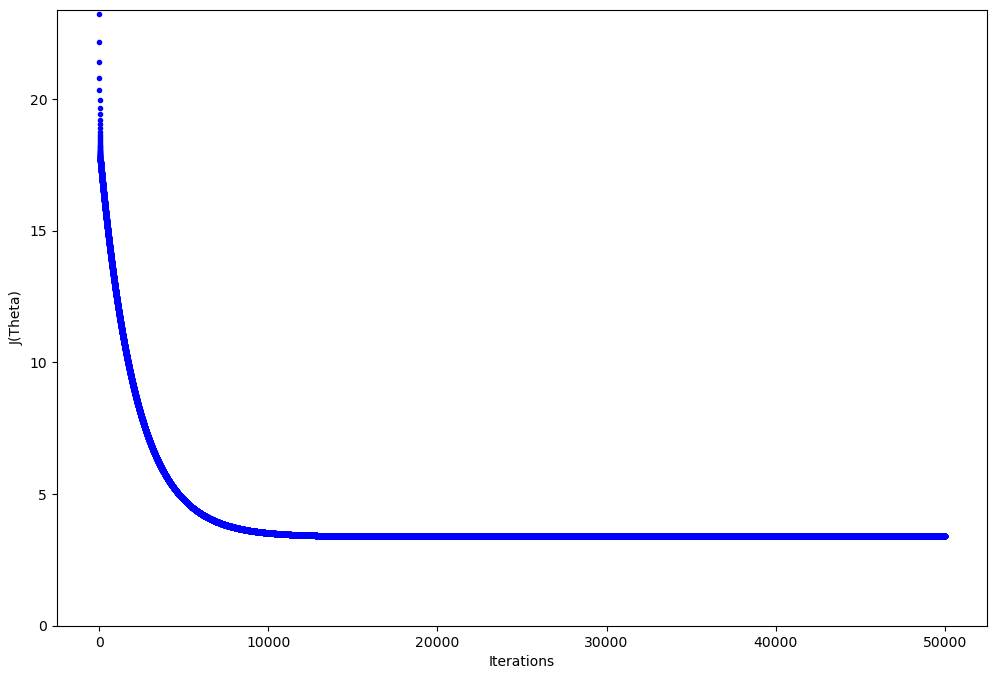

In [45]:
getcoefficients(X,y,w,0.001,50000,False,True)

Now you should see that the .fit function is not just magic. This is the basis of what it is doing and whenever you want an ML system to learn, it has to do lots of these "steps" to get the best model it can find.

Different models will use different error/lost/cost functions (Logistic Regressions uses the one I mentioned in class for example). You can control the number of epochs and the learning rates as these are hyperparameters. There are "fancier" gradient descent methods (such as Mini-batch Stochastic Gradient Descent) which makes things faster but still having good performance.

Neural Networks are much more complicated than linear regression, finding the gradient for them is even more so - but we'll come to that later.

## Cars Example
Let's try the age vs value cars example

In [46]:
x=np.array([5,4,6,5,5,5,6,6,2,7,7]).reshape(-1,1)
y=np.array([85,103,70,82,89,98,66,95,169,70,48])

We need to add the 1s for the intercept to our x

In [47]:
x

array([[5],
       [4],
       [6],
       [5],
       [5],
       [5],
       [6],
       [6],
       [2],
       [7],
       [7]])

In [48]:
onecolumn = np.ones([x.shape[0],1])
onecolumn

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [49]:
X = np.hstack((onecolumn, x))

In [50]:
X

array([[1., 5.],
       [1., 4.],
       [1., 6.],
       [1., 5.],
       [1., 5.],
       [1., 5.],
       [1., 6.],
       [1., 6.],
       [1., 2.],
       [1., 7.],
       [1., 7.]])

array([195.46846847, -20.26126126])

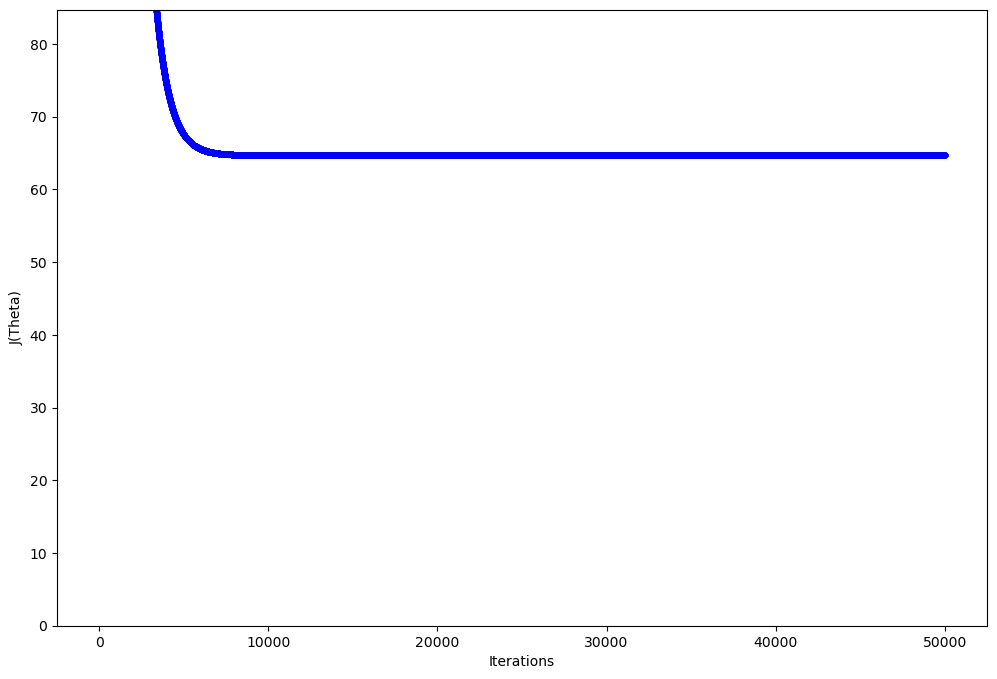

In [51]:
getcoefficients(X,y,np.random.uniform(size=2),0.01,50000,False,True)

In [52]:
model = LinearRegression()
model.fit(x,y)
print(model.intercept_, model.coef_[0])

195.46846846846847 -20.261261261261264


## Now let's try mtcars.csv

In [53]:
import pandas as pd

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
#load mtcars
dfcars=pd.read_csv("mtcars.csv")
dfcars=dfcars.rename(columns={"Unnamed: 0":"name"})
dfcars.head()

name   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2

In [56]:
y = dfcars['mpg']
allX = dfcars.iloc[:, 2:]
from sklearn.model_selection import train_test_split
allX_train, allX_test, y_train, y_test = train_test_split(allX, y, test_size=0.2, random_state=42)

In [57]:
X_train = allX_train[["wt","hp","drat"]]

In [58]:
X_train = allX_train[["wt","hp","drat"]].values
X_test = allX_test[["wt","hp","drat"]].values


In [59]:
X_train

array([[  1.935,  66.   ,   4.08 ],
       [  3.73 , 180.   ,   3.07 ],
       [  2.62 , 110.   ,   3.9  ],
       [  3.44 , 175.   ,   3.15 ],
       [  5.345, 230.   ,   3.23 ],
       [  3.46 , 105.   ,   2.76 ],
       [  3.78 , 180.   ,   3.07 ],
       [  4.07 , 180.   ,   3.07 ],
       [  3.84 , 245.   ,   3.73 ],
       [  2.875, 110.   ,   3.9  ],
       [  2.32 ,  93.   ,   3.85 ],
       [  2.14 ,  91.   ,   4.43 ],
       [  3.215, 110.   ,   3.08 ],
       [  3.52 , 150.   ,   2.76 ],
       [  1.513, 113.   ,   3.77 ],
       [  3.435, 150.   ,   3.15 ],
       [  1.615,  52.   ,   4.93 ],
       [  2.78 , 109.   ,   4.11 ],
       [  2.465,  97.   ,   3.7  ],
       [  3.19 ,  62.   ,   3.69 ],
       [  3.44 , 123.   ,   3.92 ],
       [  5.25 , 205.   ,   2.93 ],
       [  3.17 , 264.   ,   4.22 ],
       [  1.835,  65.   ,   4.22 ],
       [  3.57 , 245.   ,   3.21 ]])

Let's scale this

In [60]:
X_train = StandardScaler().fit_transform(X_train)

In [61]:
X_train

array([[-1.26234592, -1.21810835,  0.86474409],
       [ 0.6147756 ,  0.64834799, -0.94426902],
       [-0.54600707, -0.49772169,  0.54234571],
       [ 0.31150805,  0.56648587, -0.80098086],
       [ 2.30366208,  1.4669692 , -0.65769269],
       [ 0.33242306, -0.57958381, -1.49951067],
       [ 0.6670631 ,  0.64834799, -0.94426902],
       [ 0.97033065,  0.64834799, -0.94426902],
       [ 0.72980811,  1.71255556,  0.23785836],
       [-0.27934078, -0.49772169,  0.54234571],
       [-0.85973211, -0.7760529 ,  0.45279061],
       [-1.04796714, -0.80879775,  1.49162982],
       [ 0.07621427, -0.49772169, -0.926358  ],
       [ 0.39516806,  0.15717527, -1.49951067],
       [-1.70365248, -0.44860442,  0.30950244],
       [ 0.3062793 ,  0.15717527, -0.80098086],
       [-1.59698596, -1.44732229,  2.38718087],
       [-0.37868704, -0.51409412,  0.91847715],
       [-0.70809834, -0.71056321,  0.1841253 ],
       [ 0.05007052, -1.28359805,  0.16621427],
       [ 0.31150805, -0.28488018,  0.578

In [62]:
model = LinearRegression()
model.fit(X_train, y_train)
#model.score(X_test, y_test)

LinearRegression()

In [63]:
print(model.intercept_,model.coef_)

20.168 [-2.82706981 -2.22336158  0.94591045]


Now with our method

In [166]:
w = np.random.uniform(size=4)

In [167]:
w

array([0.67376951, 0.7388366 , 0.91777213, 0.51817622])

In [168]:
Xs = np.hstack((np.ones([allX_train[["wt","hp","drat"]].values.shape[0],1]), allX_train[["wt","hp","drat"]]))


In [169]:
Xs = np.hstack((np.ones([X_train.shape[0],1]), X_train))
Xs.shape

(25, 4)

In [170]:
ys = y_train.values

In [171]:
error(Xs,ys,w)

213.79081798079997

In [172]:
fullgrad(Xs, ys, w)

array([-19.49423049,   6.13927851,   5.91027723,  -4.35417997])

In [173]:
alpha = 1

In [174]:
w = w - alpha*fullgrad(Xs,ys,w)

In [175]:
w

array([20.168     , -5.4004419 , -4.99250509,  4.87235619])

In [176]:
error(Xs,ys,w)

34.63146944779251

array([20.168     , -2.82706981, -2.22336158,  0.94591045])

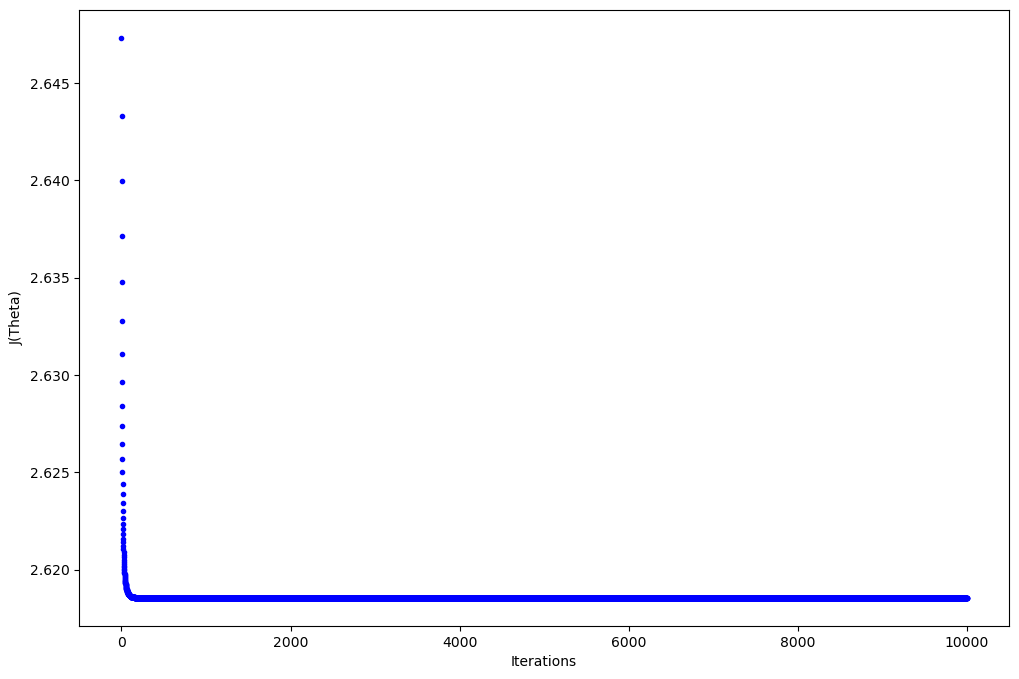

In [183]:
getcoefficients(Xs,ys,Ws,0.1,10000,False, True, showall=True)

The Other Gradient Descent Workbook I've put on Moodle was written by someone else. Some bits are more complicated, but the pictures are nicer. 

I want you to get the idea of what's happening, you are not expected to generate code like that

## Alternative

As an alternative you can split the calculations up a little for when you use

$\hat{y} = w^Tx + b$

you might want to get the $b$ separately

In [184]:
def error(X,y,w,b):
    div = 2*len(y)
    return ((np.dot(X,w)+b - y)**2).sum()/div

In [185]:
def bchange(X,y,w,b):
    div = len(X)
    return (np.dot(X,w)+b - y).sum()/div

In [186]:
def grad(X,y,w,b,c):
    div = len(X)
    return (X[:, c]*(np.dot(X,w)+b - y)).sum()/div

In [187]:
def loopfullgrad(X,y,w,b):
    allgrad = np.array([])
    #get b
    for i in range(len(w)):
        allgrad = np.append(allgrad, grad(X,y,w,b,i))
    return allgrad

In [188]:
def fullgrad(X,y,w,b):
    div = len(y)
    prediction = np.dot(X,w)+b
    allgrad = X.T.dot((prediction - y))/div
    return allgrad

In [189]:
x=np.array([5,4,6,5,5,5,6,6,2,7,7]).reshape(-1,1)
y=np.array([85,103,70,82,89,98,66,95,169,70,48])
b = 6
w = np.array([20])

In [190]:
alpha=0.01

In [192]:
fullgrad(x,y,w,b)

array([194.18181818])

In [193]:
bchange(x,y,w,b)

22.818181818181817

In [194]:
for i in range(50000):
    b = b - alpha*bchange(x,y,w,b)
    w = w - alpha*fullgrad(x,y,w,b)

In [195]:
b,w

(195.46846846844505, array([-20.26126126]))

# Regularisation

We need to update our error function

\begin{equation}
\frac{1}{2m}\left(\sum (\widehat{y_i} - y_i)^2 + \lambda\sum w_j^2\right)
\end{equation}

In [196]:
def error(X,y,w,b,l):
    div = 2*len(y)
    return (((np.dot(X,w)+b - y)**2).sum() + l*((w**2).sum()))/div

bchange stays the same

In [197]:
def bchange(X,y,w,b):
    div = len(X)
    return (np.dot(X,w)+b - y).sum()/div

Now

\begin{equation}
\frac{\partial L}{\partial w_c} = \frac{1}{m}\left(\sum (\widehat{y_i}-y_i)*x_c + \lambda w_c\right)
\end{equation}

In [198]:
def fullgrad(X,y,w,b,l):
    div = len(y)
    prediction = np.dot(X,w)+b
    allgrad = (X.T.dot((prediction - y)) + l*w)/div
    return allgrad

In [199]:
x=np.array([5,4,6,5,5,5,6,6,2,7,7]).reshape(-1,1)
y=np.array([85,103,70,82,89,98,66,95,169,70,48])
b = 6
w = np.array([20])
l = 0.1
alpha = 0.001

In [200]:
l

0.1

In [201]:
fullgrad(x,y,w,b,l)

array([194.36363636])

In [202]:
error(x,y,w,b,l)

1813.8636363636363

In [203]:
b = b - alpha*bchange(x,y,w,b)
w = w - alpha*fullgrad(x,y,w,b,l)

In [204]:
error(x,y,w,b,l)

1776.1720274542029

In [205]:
for i in range(200000):
    b = b - alpha*bchange(x,y,w,b)
    w = w - alpha*fullgrad(x,y,w,b,l)

In [206]:
b,w

(194.94063941645925, array([-20.16116823]))

In [1]:
from sklearn.linear_model import Ridge

In [2]:
Ridge?

Init signature:
Ridge(
    alpha=1.0,
    *,
    fit_intercept=True,
    copy_X=True,
    max_iter=None,
    tol=0.0001,
    solver='auto',
    positive=False,
    random_state=None,
)
Docstring:     
Linear least squares with l2 regularization.

Minimizes the objective function::

||y - Xw||^2_2 + alpha * ||w||^2_2

This model solves a regression model where the loss function is
the linear least squares function and regularization is given by
the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
This estimator has built-in support for multi-variate regression
(i.e., when y is a 2d-array of shape (n_samples, n_targets)).

Read more in the :ref:`User Guide <ridge_regression>`.

Parameters
----------
alpha : {float, ndarray of shape (n_targets,)}, default=1.0
    Constant that multiplies the L2 term, controlling regularization
    strength. `alpha` must be a non-negative float i.e. in `[0, inf)`.

    When `alpha = 0`, the objective is equivalent to ordinary least
    s

In [208]:
model = Ridge(alpha = l)
model.fit(x,y)
print(model.intercept_,model.coef_)

194.9417301658449 [-20.16136262]


In [209]:
from sklearn.metrics import mean_squared_error

In [210]:
mean_squared_error(y, model.predict(x))

129.43026734630882

In [211]:
mean_squared_error(y, np.dot(x,w)+b)

129.43033867540152